# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
train = pd.read_csv('train.csv', sep = ',', index_col = 'Id')
test = pd.read_csv('test.csv', sep = ',', index_col = 'Id')
sub = pd.read_csv('sample_submission.csv', sep = ',', index_col = 'Id')

In [3]:
train.shape, test.shape, sub.shape

((1460, 80), (1459, 79), (1459, 1))

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Feature Selection

14
Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


((1460, 14), (1459, 13))

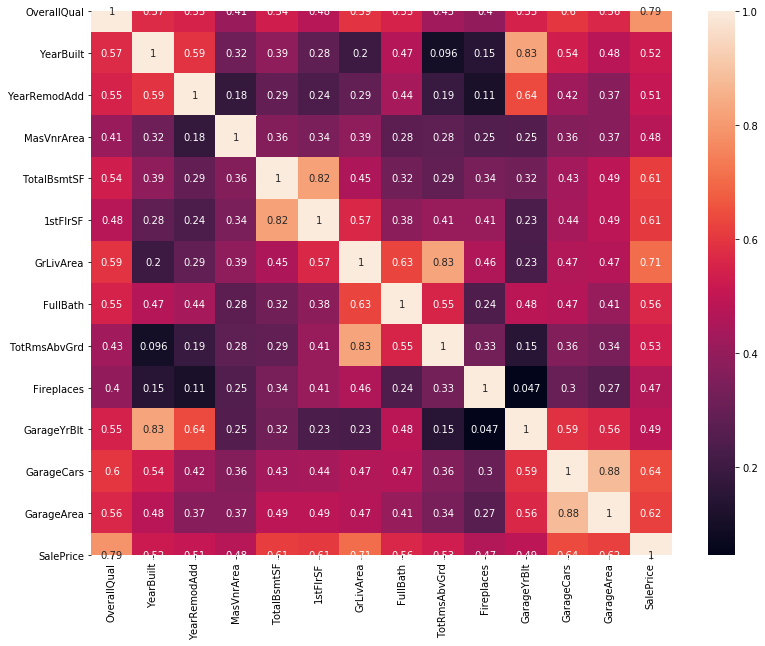

In [5]:
# 일단 feature가 너무 많음 -> SalePrice와 상관관계가 큰 feature만 선택하자

corr = train.corr()
top_corr = corr.index[abs(corr.SalePrice) > 0.4]
print(len(top_corr))
print( top_corr )
# plot
plt.figure( figsize = (13,10) )
sns.heatmap( train[top_corr].corr(), annot = True )

# 위의 14개의 feature만 사용

train = train[top_corr]
test = test[top_corr[:-1]] # SalePrice 제외

train.shape, test.shape

In [6]:
corr['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

# Check NA

In [8]:
count = 0
for i, x in enumerate(train.isna().sum()):
    if( x > 0 ):
        count +=1
        print(i,train.columns[i],x)
        
print("\n\ntotal na number is ", count)

3 MasVnrArea 8
10 GarageYrBlt 81


total na number is  2


In [14]:
'''
MasVnrArea: Masonry veneer area in square feet
제곱 피트의 벽돌 베니어 영역
-> 1 제곱 피트의 크기에 벽돌 배니어가 얼마나 들어오나 : 개인적으로 집값에 큰 영향 없을거라 판단

GarageYrBlt: Year garage was built
차고가 지어진 해
-> 차고가 없는 집은 결측치로 선정됨
'''
# MasVnrArea는 1460개중 8개만 na이므로 그냥 평균으로 대체
mean = int(train['MasVnrArea'].mean())
train['MasVnrArea'].fillna(mean, inplace = True) 


In [18]:
train.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [16]:
train['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [17]:
train['GarageYrBlt'].fillna(0, inplace = True)

# Categorical Data -> one-hot encoding

In [31]:
for name in train.columns:
    print(type(train[name].iloc[0]),name)

<class 'numpy.int64'> OverallQual
<class 'numpy.int64'> YearBuilt
<class 'numpy.int64'> YearRemodAdd
<class 'numpy.float64'> MasVnrArea
<class 'numpy.int64'> TotalBsmtSF
<class 'numpy.int64'> 1stFlrSF
<class 'numpy.int64'> GrLivArea
<class 'numpy.int64'> FullBath
<class 'numpy.int64'> TotRmsAbvGrd
<class 'numpy.int64'> Fireplaces
<class 'numpy.float64'> GarageYrBlt
<class 'numpy.int64'> GarageCars
<class 'numpy.int64'> GarageArea
<class 'numpy.int64'> SalePrice


In [30]:
train.head()
# OverallQual : categorical
# YearBuilt : categorical
# YearRemodAdd : categorical
# MasVnrArea : categorical
# TotalBsmtSF : numerical
# 1stFlrSF : numerical
# GrLivArea : numerical
# FullBath : categorical
# TotRmsAbvGrd : categorical
# Fireplaces : categorical
# GarageYrBlt : categorical
# GarageCars # numerical

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,,,,
1,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
2,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
3,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
4,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
5,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000


In [ ]:
# data & label로 분리

y_train = train.pop('SalePrice')
X_train = train

y_test = train.pop('SalePrice')
X_test = train